In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
Value1=pd.read_csv("FFACapeOI 010118 190224.csv")
Value1.set_index("Date",inplace=True)
Value1.rename(columns={"Value":"FFACapeO010118"},inplace=True)

In [4]:
Value2=pd.read_csv("FFADV_C3 010118 190224.csv")
Value2.set_index("Date",inplace=True)
Value2.rename(columns={"Value":"C3010118"},inplace=True)

In [5]:
di_ex=["FFACapeOI 010118 190224.csv",
"FFADV_C3 010118 190224.csv",
"FFADV_C5 010118 190224.csv",
"FFADV_C5TC 010118 190224.csv",
"FFADV_C7 010118 190224.csv",
"FFADVCape_T 020707 190224.csv","ODV_C5TC 010118 190224.csv","OptionsCapeOI 010118 190224.csv"]

In [6]:
Value3=pd.read_csv("FFADV_C5 010118 190224.csv")
Value3.set_index("Date",inplace=True)
Value3.rename(columns={"Value":"C5010118"},inplace=True)

In [7]:
Value4=pd.read_csv("FFADV_C5TC 010118 190224.csv")
Value4.set_index("Date",inplace=True)
Value4.rename(columns={"Value":"C5TC010118"},inplace=True)

In [8]:
Value5=pd.read_csv("FFADVCape_T 020707 190224.csv")
Value5.set_index("Date",inplace=True)
Value5.rename(columns={"Value":"020707"},inplace=True)

In [9]:
Value6=pd.read_csv("ODV_C5TC 010118 190224.csv")
Value6.set_index("Date",inplace=True)
Value6.rename(columns={"Value":"010118"},inplace=True)

In [10]:
Value7=pd.read_csv("OptionsCapeOI 010118 190224.csv")
Value7.set_index("Date",inplace=True)
Value7.rename(columns={"Value":"CapeOI010118"},inplace=True)

In [11]:
df = pd.concat([Value1,Value2,Value3,Value4,Value5,Value6,Value7],axis=1)

In [12]:
df.reset_index(inplace=True)


In [13]:
df.head()

Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
0  02/01/2018         54040.0       0.0       0.0       475.0   475.0    84.0   
1  08/01/2018         59753.0       0.0       0.0      1360.0  1360.0   180.0   
2  15/01/2018         63213.0       0.0      50.0       730.0   780.0   630.0   
3  22/01/2018         64229.0       0.0       0.0      1480.0  1540.0     0.0   
4  29/01/2018         65683.0       0.0       0.0       414.0   414.0  1395.0   

   CapeOI010118  
0       77208.0  
1       80202.0  
2       81912.0  
3       82662.0  
4       89262.0

In [14]:



df["Date"]=pd.to_datetime(df["Date"])

In [15]:
df = (df.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [16]:
df.set_index("Date",inplace=True)

In [17]:
df[df.index=='07/01/2020']

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2020-07-01        124002.0      50.0     220.0      2420.0  2690.0  4500.0   

            CapeOI010118  
Date                      
2020-07-01      168068.0

In [18]:
# df_M=df.resample("W").mean()
df_M=df

In [19]:
df_M.fillna(method="ffill",inplace=True)

In [20]:
df_M.tail()

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2023-12-09        187806.0       0.0      50.0      4462.0  4512.0   380.0   
2023-12-10        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-11        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-12        187806.0      75.0     500.0      5394.0  5969.0   420.0   
2023-12-13        187806.0       0.0       0.0      6433.0  6433.0  2880.0   

            CapeOI010118  
Date                      
2023-12-09      154653.0  
2023-12-10      154653.0  
2023-12-11      154653.0  
2023-12-12      154653.0  
2023-12-13      154653.0

In [21]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [22]:
Data_1.head()

Unnamed: 0  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  \
Date                                                                      
2014-06-02           0      13825.0     16590.0     19070.0     23014.0   
2014-06-03           1      15010.0     18002.0     20302.0     23880.0   
2014-06-04           2      15050.0     18052.0     20372.0     23850.0   
2014-06-05           3      14715.0     17748.0     20094.0     23630.0   
2014-06-06           4      14812.0     17762.0     20114.0     23700.0   

            5TC_C+4MON  5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  \
Date                                                               ...   
2014-06-02     25734.0           0    13825.0   19558.0   27098.0  ...   
2014-06-03     26872.0           0    15010.0   20728.0   28084.0  ...   
2014-06-04     27132.0           0    15050.0   20758.0   27971.0  ...   
2014-06-05     27382.0           0    14715.0   20491.0   27581.0  ...   
2014-06-06     27548.0           0    14812.0   20525.0   27650.0  ...   

            5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                           
2014-06-02   18853.0   24375.0   30023.0     21981.0     20808.0     20254.0   
2014-06-03   19230.0   24893.0   30483.0     22445.0     21051.0     20396.0   
2014-06-04   19220.0   24808.0   30588.0     22473.0     21001.0     20386.0   
2014-06-05   18918.0   24480.0   30370.0     22267.0     20900.0     20295.0   
2014-06-06   18958.0   24553.0   30473.0     22287.0     20940.0     20294.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2014-06-02     19745.0     19585.0     19418.0     19258.0  
2014-06-03     19836.0     19625.0     19458.0     19298.0  
2014-06-04     19826.0     19625.0     19458.0     19298.0  
2014-06-05     19695.0     19514.0     19357.0     19187.0  
2014-06-06     19695.0     19504.0     19579.0     19177.0  

[5 rows x 21 columns]

In [23]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [24]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [25]:
Data=Data.iloc[:,1:]

In [26]:
Data

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...                 ...         ...         ...         ...         ...   
2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
...                ...        ...       ...       ...       ...       ...   
2024-02-26     26536.0    22304.0   27467.0   26464.0   26407.0   16093.0   
2024-02-27     27157.0    23039.0   28564.0   27204.0   27039.0   16379.0   
2024-02-28     28000.0    24162.0   30476.0   28125.0   27664.0   16736.0   
2024-02-29     27164.0    24105.0   30101.0   27093.0   26818.0   16443.0   
2024-03-01     28429.0    25678.0   32963.0   28211.0   27907.0   17050.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
...              ...       ...         ...         ...         ...   
2024-02-26   19871.0   22893.0     20907.0     19907.0     18936.0   
2024-02-27   20114.0   23171.0     21239.0     20114.0     19057.0   
2024-02-28   20600.0   23636.0     21736.0     20486.0     19436.0   
2024-02-29   20464.0   23514.0     21489.0     20350.0     19336.0   
2024-03-01   21121.0   24174.0     22143.0     20643.0     19539.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
...                ...         ...         ...         ...  
2024-02-26     18443.0     18179.0     18107.0     18057.0  
2024-02-27     18543.0     18250.0     18164.0     18107.0  
2024-02-28     18829.0     18393.0     18300.0     18243.0  
2024-02-29     18814.0     18379.0     18300.0     18250.0  
2024-03-01     19021.0     18483.0     18350.0     18357.0  

[2541 rows x 20 columns]

In [27]:

Data.reset_index(inplace=True)

In [28]:
Data

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1    2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2    2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
3    2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
4    2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...         ...          ...         ...         ...         ...         ...   
2536 2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2537 2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2538 2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2539 2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2540 2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1            0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   
2            0.0    13593.0   13704.0   16467.0  ...   15150.0   15054.0   
3            0.0    14447.0   14158.0   16817.0  ...   15208.0   15192.0   
4            0.0    14556.0   14258.0   16942.0  ...   15183.0   15208.0   
...          ...        ...       ...       ...  ...       ...       ...   
2536     26536.0    22304.0   27467.0   26464.0  ...   16093.0   19871.0   
2537     27157.0    23039.0   28564.0   27204.0  ...   16379.0   20114.0   
2538     28000.0    24162.0   30476.0   28125.0  ...   16736.0   20600.0   
2539     27164.0    24105.0   30101.0   27093.0  ...   16443.0   20464.0   
2540     28429.0    25678.0   32963.0   28211.0  ...   17050.0   21121.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1      15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   
2      15592.0     15533.0     13317.0     13442.0     13738.0     14046.0   
3      15767.0     15717.0     13417.0     13475.0     13767.0     14075.0   
4      15783.0     15746.0     13417.0     13483.0     13767.0     14075.0   
...        ...         ...         ...         ...         ...         ...   
2536   22893.0     20907.0     19907.0     18936.0     18443.0     18179.0   
2537   23171.0     21239.0     20114.0     19057.0     18543.0     18250.0   
2538   23636.0     21736.0     20486.0     19436.0     18829.0     18393.0   
2539   23514.0     21489.0     20350.0     19336.0     18814.0     18379.0   
2540   24174.0     22143.0     20643.0     19539.0     19021.0     18483.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        14054.0     14054.0  
1        14033.0     14033.0  
2        14038.0     14038.0  
3        14058.0     14058.0  
4        14050.0     14050.0  
...          ...         ...  
2536     18107.0     18057.0  
2537     18164.0     18107.0  
2538     18300.0     18243.0  
2539     18300.0     18250.0  
2540     18350.0     18357.0  

[2541 rows x 21 columns]

In [29]:
Data=Data.drop_duplicates()

In [30]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [31]:
Data_F

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
1    2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2    2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
3    2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
4    2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...         ...          ...         ...         ...         ...         ...   
2137 2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2138 2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2139 2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2140 2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2141 2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    13465.0   16653.0   18270.0  ...   13830.0   14830.0   
1            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
2            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
3            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
4            0.0    13925.0   16943.0   18630.0  ...   14060.0   15080.0   
...          ...        ...       ...       ...  ...       ...       ...   
2137     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2138     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2139     15657.0    27763.0   12606.0   16175.0  ...   19625.0   11779.0   
2140     16350.0    28734.0   13763.0   17057.0  ...   19986.0   12136.0   
2141     16136.0    28207.0   12758.0   16639.0  ...   19714.0   11943.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      16790.0     16520.0     15530.0     15140.0     15000.0     15010.0   
1      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
2      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
3      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
4      16970.0     16790.0     15640.0     15210.0     15030.0     15030.0   
...        ...         ...         ...         ...         ...         ...   
2137   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2138   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2139   15629.0     16821.0     16200.0     16436.0     16443.0     16386.0   
2140   15971.0     17534.0     16554.0     16657.0     16629.0     16543.0   
2141   15779.0     17030.0     16271.0     16604.0     16604.0     16507.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        15490.0     15530.0  
1        15510.0     15540.0  
2        15510.0     15540.0  
3        15510.0     15540.0  
4        15520.0     15540.0  
...          ...         ...  
2137     16307.0     16307.0  
2138     16307.0     16307.0  
2139     16279.0     16279.0  
2140     16421.0     16400.0  
2141     16386.0     16371.0  

[2142 rows x 21 columns]

In [32]:

Data_F.set_index("Date",inplace=True)

In [33]:
Data_F.head(10)

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
2018-02-06      13430.0     16380.0     17410.0     17450.0     17430.0   
2018-02-07      13220.0     16320.0     17350.0     17500.0     17500.0   
2018-02-08      13850.0     16860.0     18010.0     17720.0     17670.0   
2018-02-09      14350.0     16970.0     18150.0     17780.0     17710.0   
2018-02-10      14350.0     16970.0     18150.0     17780.0     17710.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0   13830.0   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0   14060.0   
2018-02-06         0.0    14905.0   17430.0   18870.0   21940.0   14240.0   
2018-02-07         0.0    14770.0   17450.0   18950.0   22230.0   14380.0   
2018-02-08         0.0    15355.0   17800.0   19050.0   22310.0   14530.0   
2018-02-09         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   
2018-02-10         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2018-02-01   14830.0   16790.0     16520.0     15530.0     15140.0   
2018-02-02   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-03   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-04   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-05   15080.0   16970.0     16790.0     15640.0     15210.0   
2018-02-06   15180.0   17070.0     16940.0     15730.0     15270.0   
2018-02-07   15260.0   17200.0     17040.0     15740.0     15250.0   
2018-02-08   15350.0   17330.0     17090.0     15910.0     15310.0   
2018-02-09   15400.0   17360.0     17140.0     15960.0     15332.0   
2018-02-10   15400.0   17360.0     17140.0     15960.0     15332.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2018-02-01     15000.0     15010.0     15490.0     15530.0  
2018-02-02     15010.0     15020.0     15510.0     15540.0  
2018-02-03     15010.0     15020.0     15510.0     15540.0  
2018-02-04     15010.0     15020.0     15510.0     15540.0  
2018-02-05     15030.0     15030.0     15520.0     15540.0  
2018-02-06     15160.0     15150.0     15530.0     15550.0  
2018-02-07     15180.0     15190.0     15540.0     15560.0  
2018-02-08     15220.0     15220.0     15570.0     15590.0  
2018-02-09     15250.0     15250.0     15570.0     15590.0  
2018-02-10     15250.0     15250.0     15570.0     15590.0

In [34]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [35]:
Data_2.shape

(2142, 20)

In [36]:
# Data_W=Data_2.resample("W-Sun").mean()

In [37]:
Data_W=Data_2

In [38]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [39]:
Data_W.tail()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2023-12-09     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-10     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-11     15657.0    27763.0   12606.0   16175.0   18879.0   19625.0   
2023-12-12     16350.0    28734.0   13763.0   17057.0   19329.0   19986.0   
2023-12-13     16136.0    28207.0   12758.0   16639.0   19007.0   19714.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2023-12-09   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-10   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-11   11779.0   15629.0     16821.0     16200.0     16436.0   
2023-12-12   12136.0   15971.0     17534.0     16554.0     16657.0   
2023-12-13   11943.0   15779.0     17030.0     16271.0     16604.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2023-12-09     16450.0     16393.0     16307.0     16307.0  
2023-12-10     16450.0     16393.0     16307.0     16307.0  
2023-12-11     16443.0     16386.0     16279.0     16279.0  
2023-12-12     16629.0     16543.0     16421.0     16400.0  
2023-12-13     16604.0     16507.0     16386.0     16371.0

In [40]:
Data_new=pd.concat([Data_W,df_M],axis=1)

In [41]:
Data_new.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
dtype: int64

In [42]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)


# .resample("W-SUN").mean()
Tag_f=Target

Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

In [43]:
Tag_f.drop("shift_30",axis=1,inplace=True)

In [44]:
Tag_f.fillna(method="ffill",inplace=True)

In [45]:
Tag_f=Tag_f.iloc[:,:]

In [46]:
Tag_f["shift_30"]=Tag_f["Value"].shift(-30)

In [47]:
Tag_f.shape

(2142, 387)

In [48]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [49]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_30"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [50]:
Imp_f= {k:v for k,v in cor.items() if v>.30 or v<-.30}
len(Imp_f)

189

In [51]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [52]:
keys

['Value',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_fshift_21',
 'Value_fshift_28',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_rollm_42',
 'Value_rollm_49',
 'Value_rollm_54',
 'Value_rollm_63',
 'Value_rollm_70',
 'Value_rollm_90',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'Value_ewm_28',
 'Value_ewm_35',
 'Value_ewm_42',
 'Value_ewm_49',
 'Value_ewm_54',
 'Value_ewm_63',
 'Value_ewm_70',
 'Value_Delta_35',
 'Value_Delta_42',
 'Value_Delta_49',
 'Value_Delta_54',
 'Value_Delta_63',
 'Value_Delta_70',
 'Value_Delta_90',
 'Value_Delta_100',
 'Value_Delta_150',
 'Value_Delta_180',
 'Value_Delta_210',
 'Value_Delta_1_3',
 'Value_Delta_1_4',
 'Value_Delta_2_3',
 'Value_Delta_2_4',
 'ValueSlope_49shift',
 'ValueSlope_54shift',
 'ValueSlope_63shift',
 'ValueSlope_70shift',
 'ValueSlope_90shift',
 'ValueSlope_100shift',
 'ValueSlope_120shift',
 'ValueSlope_150shift',
 

In [53]:
Data_new.fillna(method="ffill")

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...                 ...         ...         ...         ...         ...   
2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  ...  \
Date                                                             ...   
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0  ...   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0  ...   
...                ...        ...       ...       ...       ...  ...   
2023-12-09     15557.0    27285.0   12713.0   15968.0   18829.0  ...   
2023-12-10     15557.0    27285.0   12713.0   15968.0   18829.0  ...   
2023-12-11     15657.0    27763.0   12606.0   16175.0   18879.0  ...   
2023-12-12     16350.0    28734.0   13763.0   17057.0   19329.0  ...   
2023-12-13     16136.0    28207.0   12758.0   16639.0   19007.0  ...   

            5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  FFACapeO010118  C3010118  \
Date                                                                       
2018-02-01     15010.0     15490.0     15530.0         54040.0       0.0   
2018-02-02     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-03     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-04     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-05     15030.0     15520.0     15540.0         54040.0       0.0   
...                ...         ...         ...             ...       ...   
2023-12-09     16393.0     16307.0     16307.0        187806.0       0.0   
2023-12-10     16393.0     16307.0     16307.0        187806.0       0.0   
2023-12-11     16386.0     16279.0     16279.0        187806.0       0.0   
2023-12-12     16543.0     16421.0     16400.0        187806.0      75.0   
2023-12-13     16507.0     16386.0     16371.0        187806.0       0.0   

            C5010118  C5TC010118  020707  010118  CapeOI010118  
Date                                                            
2018-02-01       0.0       475.0   475.0    84.0       77208.0  
2018-02-02      50.0      1510.0  1970.0     0.0       77208.0  
2018-02-03       0.0       475.0   475.0     0.0       77208.0  
2018-02-04       0.0        95.0   475.0     0.0       77208.0  
2018-02-05       0.0      1615.0  1615.0     0.0       77208.0  
...              ...         ...     ...     ...           ...  
2023-12-09      50.0      4462.0  4512.0   380.0      154653.0  
2023-12-10     200.0      4210.0  4410.0   630.0      154653.0  
2023-12-11     200.0      4210.0  4410.0   630.0      154653.0  
2023-12-12     500.0      5394.0  5969.0   420.0      154653.0  
2023-12-13       0.0      6433.0  6433.0  2880.0      154653.0  

[2142 rows x 27 columns]

In [54]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [55]:
Final.isnull().sum()

5TC_CCURMON                         0
5TC_C+1MON                          0
5TC_C+2MON                          0
5TC_C+3MON                          0
5TC_C+4MON                          0
                                   ..
EMA_Value_ewm_210-Value_ewm_49      0
EMA_Value_ewm_210-Value_ewm_63      0
EMA_Value_ewm_210-Value_ewm_90      0
EMA_Value_ewm_210-Value_ewm_120     0
shift_30                           30
Length: 216, dtype: int64

In [56]:
Data_f=Final.iloc[:-30,:]

In [57]:
Data_f.isnull().sum()

5TC_CCURMON                        0
5TC_C+1MON                         0
5TC_C+2MON                         0
5TC_C+3MON                         0
5TC_C+4MON                         0
                                  ..
EMA_Value_ewm_210-Value_ewm_49     0
EMA_Value_ewm_210-Value_ewm_63     0
EMA_Value_ewm_210-Value_ewm_90     0
EMA_Value_ewm_210-Value_ewm_120    0
shift_30                           0
Length: 216, dtype: int64

In [58]:
Data_f.shape

(2112, 216)

In [59]:
Data_f.dropna(axis=1,inplace=True)

In [60]:
Data_f.shape

(2112, 216)

In [61]:
f_c=list(Data_f.columns)

In [62]:
f_c.remove("shift_30")

In [63]:
f_c[-10:]

['EMA_Value_ewm_150-Value_ewm_120',
 'EMA_Value_ewm_150-Value_ewm_180',
 'EMA_Value_ewm_150-Value_ewm_210',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_35',
 'EMA_Value_ewm_210-Value_ewm_49',
 'EMA_Value_ewm_210-Value_ewm_63',
 'EMA_Value_ewm_210-Value_ewm_90',
 'EMA_Value_ewm_210-Value_ewm_120']

In [64]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_30"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [65]:
Data_f.shape

(2112, 216)

In [66]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.65}
len(Imp_f)

42

In [67]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [68]:
sorted_dict

{'shift_30': 1.0,
 '5TC_C+1MON': 0.6714083676533953,
 '5TC_CCURQ': 0.6258928574328054,
 '5TC_C+2MON': 0.6181259715416355,
 'Value': 0.6051606214773548,
 '5TC_CCURMON': 0.5989735404612876,
 'Value_rollm_3': 0.5907937059187046,
 'Value_ewm_3': 0.5886610393903577,
 'Value_ewm_7': 0.5819320118512862,
 '5TC_C+1Q': 0.5818196792929669,
 'Value_rollm_7': 0.5790678667617869,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5741832719239123,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5727528057594441,
 'EMA_Value_ewm_14-Value_ewm_210': 0.57205402215697,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5716220882870855,
 'EMA_Value_ewm_3-Value_ewm_180': 0.569741086932254,
 'Value_rollm_14': 0.567866740508915,
 'Value_fshift_3': 0.567831727135109,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5669324733153355,
 'Value_rollm_21': 0.5620987034231512,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5619053655806392,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5605003506306325,
 'Value_ewm_14': 0.5558873820380339,
 'EMA_Value_ewm_14-Value_ewm_90': 0.555864539

In [69]:
Data_f=Data_f[keys]

In [70]:
Data_f.shape

(2112, 42)

In [71]:
f_c=list(Data_f.columns)

f_c.remove("shift_30")

In [72]:
len(f_c)

41

In [73]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [74]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [75]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [76]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [77]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [78]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-60fb0da97b0a>", line 9, in <module>
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)
  File "/usr/local/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 1642, in apply
    return super().apply(
  File "/usr/local/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 1183, in apply
    return self._apply(
  File "/usr/local/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 539, in _apply
    return self._apply_blockwise(homogeneous_func, name)
  File "/usr/local/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 417, in _apply_blockwise
    return self._apply_series(homogeneous_func, name)
  File "/usr/local/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 406, in _apply_series
   

TypeError: object of type 'NoneType' has no len()

In [79]:
Data_f.reset_index(inplace=True)

In [80]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [81]:
Data_f.head()

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_CCURQ  \
0 2018-02-01      12160.0     14770.0     16340.0     16670.0    13465.0   
1 2018-02-02      12680.0     15760.0     16790.0     17120.0    14220.0   
2 2018-02-03      12680.0     15760.0     16790.0     17120.0    14220.0   
3 2018-02-04      12680.0     15760.0     16790.0     17120.0    14220.0   
4 2018-02-05      12380.0     15470.0     16640.0     17060.0    13925.0   

   5TC_C+1Q  5TC_C+4Q  5TC_C+1CAL    Value  ...  5TC_CCURMONSlope_8shift  \
0   16653.0   13830.0     16520.0  11791.0  ...                      NaN   
1   17050.0   13950.0     16575.0  11367.0  ...                      NaN   
2   17050.0   13950.0     16575.0  11367.0  ...                      NaN   
3   17050.0   13950.0     16575.0  11367.0  ...                      NaN   
4   16943.0   14060.0     16790.0  11189.0  ...                      NaN   

   5TC_C+1MONSlope_3shift  5TC_C+1MONSlope_4shift  5TC_C+1MONSlope_6shift  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2            4.950000e+02                     NaN                     NaN   
3            2.856994e-12                   297.0                     NaN   
4           -1.450000e+02                   -87.0                     NaN   

   week_of_month  week  Month  Day of Week  Year  Day  
0              1     5      2            3  2018    1  
1              1     5      2            4  2018    2  
2              1     5      2            5  2018    3  
3              1     5      2            6  2018    4  
4              2     6      2            0  2018    5  

[5 rows x 1118 columns]

In [82]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [83]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")
Data_f.isnull().sum()

Date           0
5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_C+3MON     0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 1118, dtype: int64

In [84]:
Data_f.set_index("Date",inplace=True)

In [85]:
Data_f=Data_f.iloc[8:,:]

In [86]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [87]:
Data_f.fillna(method="ffill",inplace=True)

In [88]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_C+3MON     0
5TC_CCURQ      0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 1117, dtype: int64

In [89]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_30"].corr(Data_f.iloc[:,i])

In [90]:
Imp_f= {k:v for k,v in cor.items() if v>=.585 or v<=-.585}
len(Imp_f)

75

In [91]:
Tag_f["Value"].corr(Final['CapeOI010118'])

-0.16263782552471456

In [92]:
sorted_dict

{'shift_30': 1.0,
 '5TC_C+1MON': 0.6714083676533953,
 '5TC_CCURQ': 0.6258928574328054,
 '5TC_C+2MON': 0.6181259715416355,
 'Value': 0.6051606214773548,
 '5TC_CCURMON': 0.5989735404612876,
 'Value_rollm_3': 0.5907937059187046,
 'Value_ewm_3': 0.5886610393903577,
 'Value_ewm_7': 0.5819320118512862,
 '5TC_C+1Q': 0.5818196792929669,
 'Value_rollm_7': 0.5790678667617869,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5741832719239123,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5727528057594441,
 'EMA_Value_ewm_14-Value_ewm_210': 0.57205402215697,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5716220882870855,
 'EMA_Value_ewm_3-Value_ewm_180': 0.569741086932254,
 'Value_rollm_14': 0.567866740508915,
 'Value_fshift_3': 0.567831727135109,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5669324733153355,
 'Value_rollm_21': 0.5620987034231512,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5619053655806392,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5605003506306325,
 'Value_ewm_14': 0.5558873820380339,
 'EMA_Value_ewm_14-Value_ewm_90': 0.555864539

In [93]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [94]:
X_Final=Data_f[keys]


In [95]:
X_Final.fillna(method="ffill",inplace=True)

In [96]:
X_Final.shape

(2104, 75)

In [97]:
X_Final.tail()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ    Value  \
Date                                                                  
2023-11-09      19104.0     16257.0     10621.0    20306.0  20618.0   
2023-11-10      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-11      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-12      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-13      19861.0     16807.0     11182.0    20742.0  21619.0   

            Value_rollm_3   Value_ewm_3  shift_30  5TC_CCURMON_fshift_1  \
Date                                                                      
2023-11-09   19988.666667  19238.414739   35320.0               17564.0   
2023-11-10   20437.666667  19797.061054   35320.0               19104.0   
2023-11-11   21188.000000  20216.045791   36475.0               18986.0   
2023-11-12   21473.000000  20530.284343   38082.0               18986.0   
2023-11-13   21521.666667  20802.463257   35711.0               18986.0   

            5TC_CCURMON_fshift_2  ...  5TC_C+2MON_ewm_8  5TC_CCURQ_ewm_3  \
Date                              ...                                      
2023-11-09               17214.0  ...      11435.200737     19258.775667   
2023-11-10               17564.0  ...      11339.178433     19469.581750   
2023-11-11               19104.0  ...      11253.825274     19627.686312   
2023-11-12               18986.0  ...      11177.955799     19746.264734   
2023-11-13               18986.0  ...      11178.405155     19995.198551   

            5TC_CCURQ_ewm_4  5TC_CCURQ_ewm_6  5TC_CCURQ_ewm_8   Value_ewm_4  \
Date                                                                          
2023-11-09     19165.664297     19103.721825     19092.014106  19219.616300   
2023-11-10     19352.931437     19246.332993     19204.234761  19670.293040   
2023-11-11     19502.745150     19368.571137     19303.986454  20030.834432   
2023-11-12     19622.596120     19473.346689     19392.654626  20319.267545   
2023-11-13     19846.476896     19654.582876     19542.581890  20579.214036   

             Value_ewm_6   Value_ewm_8  Value_rollm_3_ewm_3  \
Date                                                          
2023-11-09  19564.542928  20054.958474         18882.568346   
2023-11-10  19837.179653  20212.518644         19271.342926   
2023-11-11  20070.868274  20352.572128         19750.507194   
2023-11-12  20271.172806  20477.064114         20181.130396   
2023-11-13  20463.719548  20603.945879         20516.264464   

            Value_rollm_3_ewm_4  
Date                             
2023-11-09         18957.220714  
2023-11-10         19253.309905  
2023-11-11         19640.247924  
2023-11-12         20006.798339  
2023-11-13         20309.772005  

[5 rows x 75 columns]

In [98]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [99]:
X_Final.shape

(2104, 75)

In [453]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [107]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [108]:
X_Final.fillna(method="ffill",inplace=True)

In [109]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [110]:
Tag_f.head

<bound method NDFrame.head of               Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                   
2018-02-01  11791.0         14065.0         12148.0          17118.0   
2018-02-02  11367.0         13666.0         13421.0          16664.0   
2018-02-03  11367.0         13666.0         13421.0          16664.0   
2018-02-04  11367.0         13666.0         13421.0          16664.0   
2018-02-05  11189.0         12727.0         13936.0          15158.0   
...             ...             ...             ...              ...   
2023-12-09  35320.0         49310.0         41796.0          22447.0   
2023-12-10  35320.0         49310.0         41796.0          22447.0   
2023-12-11  36475.0         42800.0         46681.0          21450.0   
2023-12-12  38082.0         34854.0         51727.0          20029.0   
2023-12-13  35711.0         35320.0         54584.0          22216.0   

            Value_fshift_21  Valu

In [101]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-365,:], target = 'shift_30', session_id=124,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [459]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [102]:
df=get_config('dataset_transformed')

In [114]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'shift_30'], dtype='object')

In [115]:
df=X_Final[df.columns]

<AxesSubplot:xlabel='Date'>

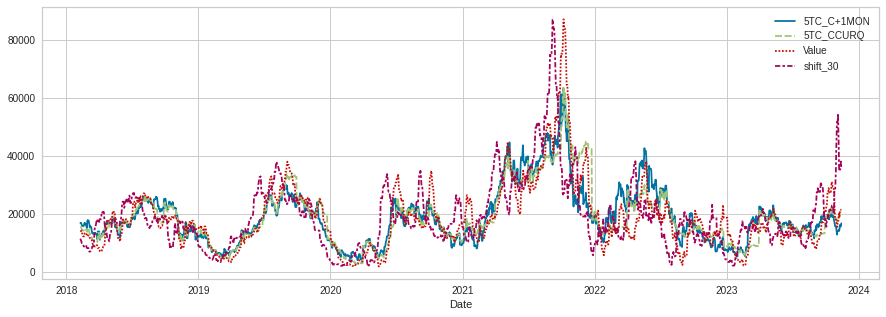

In [116]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(data=df)

In [123]:
df

5TC_C+1MON  5TC_CCURQ    Value  shift_30
Date                                                
2018-02-09     16970.0    15660.0  14136.0   11554.0
2018-02-10     16970.0    15660.0  14136.0   11206.0
2018-02-11     16970.0    15660.0  14136.0   10810.0
2018-02-12     16540.0    15180.0  14318.0   10461.0
2018-02-13     16210.0    14735.0  14075.0    9869.0
...                ...        ...      ...       ...
2023-11-09     16257.0    20306.0  20618.0   35320.0
2023-11-10     15764.0    20102.0  21473.0   35320.0
2023-11-11     15764.0    20102.0  21473.0   36475.0
2023-11-12     15764.0    20102.0  21473.0   38082.0
2023-11-13     16807.0    20742.0  21619.0   35711.0

[2104 rows x 4 columns]

In [131]:
X=df.iloc[:-365,:3]
y=df.iloc[:-365,3]

In [132]:
y

Date
2018-02-09    11554.0
2018-02-10    11206.0
2018-02-11    10810.0
2018-02-12    10461.0
2018-02-13     9869.0
               ...   
2022-11-09    13957.0
2022-11-10    13957.0
2022-11-11    13957.0
2022-11-12    13424.0
2022-11-13    13276.0
Name: shift_30, Length: 1739, dtype: float64

In [133]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
# define dataset

model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y,)

ExtraTreesRegressor()

In [134]:
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=150)
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(50,401,50),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: -0.151391 using {'max_features': 400, 'min_samples_leaf': 40, 'min_samples_split': 25, 'n_estimators': 100}


In [135]:
 grid_result.best_params_

{'max_features': 400,
 'min_samples_leaf': 40,
 'min_samples_split': 25,
 'n_estimators': 100}

In [136]:
    
model = ExtraTreesRegressor(**grid_result.best_params_)

model.fit(X, y)

ExtraTreesRegressor(max_features=400, min_samples_leaf=40, min_samples_split=25)

In [137]:
X_t=df.iloc[-365:,:3]

In [138]:
Y_t=model.predict(X_t)

In [139]:
res=pd.DataFrame()

In [140]:
res["Actual"]=df.iloc[-365:,3]

In [142]:
res["Pred"]=Y_t

In [143]:
res

Actual          Pred
Date                             
2022-11-14  14293.0  14532.203751
2022-11-15  17374.0  14261.169264
2022-11-16  18312.0  14113.501349
2022-11-17  18312.0  13084.173154
2022-11-18  18312.0  12789.724747
...             ...           ...
2023-11-09  35320.0  16591.119343
2023-11-10  35320.0  16946.345738
2023-11-11  36475.0  16946.345738
2023-11-12  38082.0  16946.345738
2023-11-13  35711.0  17038.809776

[365 rows x 2 columns]

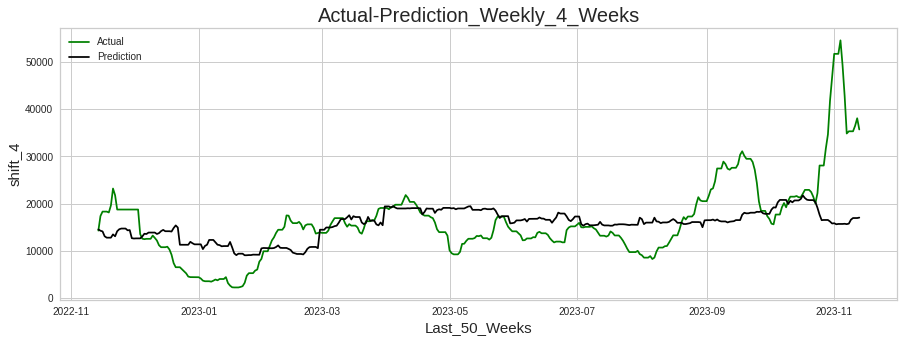

MAPE: 0.4429156006399043


In [144]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(res["Actual"],color="green",label="Actual")
plt.plot(res["Pred"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(res["Pred"].shape[0]):
    Mape.append((np.abs((res["Actual"].iloc[i] - res['Pred'].iloc[i]) / res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [193]:
df.head()

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714

In [201]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df[['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month']], variables = df.columns[:5])  

5TC_C+1MON_x  5TC_CCURQ_x  Value_x  \
5TC_C+1MON_y                              1.0       0.0007      0.0   
5TC_CCURQ_y                               0.0       1.0000      0.0   
Value_y                                   0.0       0.0000      1.0   
EMA_Value_ewm_3-Value_ewm_210_y           0.0       0.0000      0.0   
Month_y                                   0.0       0.0000      0.0   

                                 EMA_Value_ewm_3-Value_ewm_210_x  Month_x  
5TC_C+1MON_y                                              0.0000   0.0045  
5TC_CCURQ_y                                               0.0000   0.0098  
Value_y                                                   0.0000   0.0703  
EMA_Value_ewm_3-Value_ewm_210_y                           1.0000   0.0168  
Month_y                                                   0.0004   1.0000

In [202]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
5TC_C+1MON ::  265.61    > 83.9383   =>   True
5TC_CCURQ ::  110.65    > 60.0627   =>   True
Value  ::  38.71     > 40.1749   =>   False
EMA_Value_ewm_3-Value_ewm_210 ::  12.5      > 24.2761   =>   False
Month  ::  -0.77     > 12.3212   =>   False
shift_4 ::  -1.28     > 4.1296    =>   False


In [197]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month', 'shift_4'],
      dtype='object')

In [203]:
nobs = 50
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size 119 rows of train set and only 4 rows of test set
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)
     

(245, 6)
(50, 6)


In [204]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


# ADF Test on each time series column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "5TC_C+1MON" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2409
 No. Lags Chosen       = 9
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0177. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "5TC_CCURQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9131
 No. Lags Chosen       = 1
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0438. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

In [239]:
model = VAR(df[['5TC_C+1MON','shift_4']])
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  31.910804928277138
BIC :  31.985980025569763
FPE :  72224926527573.75
HQIC:  31.940910286438093 

Lag Order = 2
AIC :  31.386183387200777
BIC :  31.511786547918085
FPE :  42741438159146.13
HQIC:  31.4364892999095 

Lag Order = 3
AIC :  31.401306730681863
BIC :  31.577589447228974
FPE :  43393253948008.21
HQIC:  31.471918468896956 

Lag Order = 4
AIC :  31.303368226167382
BIC :  31.53058409836356
FPE :  39345695447980.63
HQIC:  31.394391944952716 

Lag Order = 5
AIC :  30.939344654690814
BIC :  31.217749414365198
FPE :  27341244965919.66
HQIC:  31.050887403367952 

Lag Order = 6
AIC :  30.954171367491675
BIC :  31.284022903446427
FPE :  27750996765666.082
HQIC:  31.086341099939446 

Lag Order = 7
AIC :  30.961180272600973
BIC :  31.34273865594847
FPE :  27948061577832.17
HQIC:  31.114085857704744 

Lag Order = 8
AIC :  30.974312319773798
BIC :  31.407839829654726
FPE :  28320017612950.26
HQIC:  31.148063552027033 

Lag Order = 9
AIC :  30.945637379159038
BIC :  31.4

In [240]:
x = model.select_order(maxlags=12)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [241]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Mar, 2024
Time:                     12:23:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    31.5776
Nobs:                     292.000    HQIC:                   31.4719
Log likelihood:          -5399.25    FPE:                4.33933e+13
AIC:                      31.4013    Det(Omega_mle):     4.13852e+13
--------------------------------------------------------------------
Results for equation 5TC_C+1MON
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               639.590700       262.792992            2.434           0.015
L1.5TC_C+1MON         1.016320         0.059483           17.086           0.000
L1.shift_4           -0.025901         0.034982        

In [244]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

5TC_C+1MON : 1.95
5TC_CCURQ : 2.0


In [245]:

# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df[['5TC_C+1MON','shift_4']].values[-lag_order:]
forecast_input

3


array([[14153.14285714, 44283.57142857],
       [15302.85714286, 41072.57142857],
       [17023.71428571, 36756.        ]])

In [246]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month', 'shift_4'],
      dtype='object')

In [247]:
nobs

50

In [248]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df[['5TC_C+1MON','shift_4']].index[-nobs:], columns=df[['5TC_C+1MON','shift_4']].columns + '_2d')
df_forecast.head()

5TC_C+1MON_2d    shift_4_2d
Date                                   
2022-12-11   22219.108894  30958.718225
2022-12-18   26417.431456  25756.412075
2022-12-25   28554.056543  22960.257004
2023-01-01   28703.326756  22372.949610
2023-01-08   27644.759456  23066.172219

In [249]:
Res=pd.concat([df_forecast["shift_4_2d"],df["shift_4"][-50:]],axis=1)

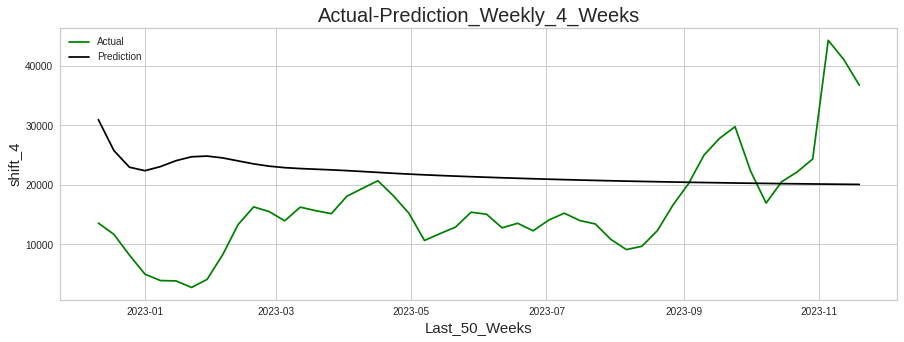

MAPE: 1.0398622140415017


In [250]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["shift_4_2d"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['shift_4_2d'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))


In [115]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i][-1][:-1])
        Y_train.append(train[i][-1])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i][-1][:-1])
        Y_val.append(val[i][-1])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(150,input_shape = (train.shape[1]-1,1),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss']

def forecast(model,train,n_days_for_forecast):
    X_train = []
    Y_train = []

    # Loop for training data
    for i in range(train.shape[0]):
        X_train.append(train[i][:-1])
        Y_train.append(train[i][-1])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    n_days_for_prediction=n_days_for_forecast
    prediction = model.predict(X_train[-n_days_for_prediction:])
    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred_future = sc.inverse_transform(prediction_copies)[:,0]

    forecast_dates = []
    for time_i in predict_period_dates:
        forecast_dates.append(time_i.date())

    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
#     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
    return df_forecast

# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(test.shape[0]):
        X_test.append(test[i][:-1])
        Y_test.append(test[i][-1])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)

    bdp =1- np.round(np.min(np.abs(Y_hat-Y_test)/ Y_test),2)
    ldp =1- np.round(np.max(np.abs(Y_hat-Y_test)/ Y_test),2)


    mape = mean_absolute_percentage_error(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat, mape, bdp*100, np.clip(ldp,0.7,1)*100

# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.figure(figsize = (20,7))
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("Price Prediction using Multivatiate-RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.figure(figsize = (20,7))
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [103]:
series = df
df

5TC_C+1MON  5TC_CCURQ    Value  shift_30
Date                                                
2022-09-30     14957.0    15000.0  16214.0   13852.0
2019-11-07     18525.0    18657.0  20330.0   23704.0
2019-08-28     29963.0    28850.0  32199.0   24927.0
2022-03-05     26421.0    14873.0  13560.0   14896.0
2019-04-17      8642.0     8321.0   6209.0   11909.0
...                ...        ...      ...       ...
2022-09-01     14771.0    13307.0   3887.0   16214.0
2020-01-23      6444.0     7588.0   5071.0    2787.0
2019-02-24      6625.0     6929.0   5873.0    3763.0
2019-12-14     14681.0    20294.0  18002.0    9322.0
2018-04-07     12130.0    11957.0   7156.0   18308.0

[1739 rows x 4 columns]

In [104]:
len


<function len(obj, /)>

In [105]:
2100/5.75

365.2173913043478

In [106]:
n_past = 15
n_days_for_prediction=365
train_data = series[:int(len(series)-((len(series)/5.7534246575342465)))-50].dropna()
val_data = series[int(len(series)-((len(series)/5.7534246575342465)))-50:int(len(series)-((len(series)/5.7534246575342465)))].dropna()
test_data = series[int(len(series)-((len(series)/5.7534246575342465))):].dropna()

In [107]:
test_data.shape

(303, 4)

In [108]:
train_data.iloc[:,-1]

Date
2022-09-30    13852.0
2019-11-07    23704.0
2019-08-28    24927.0
2022-03-05    14896.0
2019-04-17    11909.0
               ...   
2018-05-17    18244.0
2021-02-27    18987.0
2020-12-22    25515.0
2018-02-22     9064.0
2020-01-17     2445.0
Name: shift_30, Length: 1386, dtype: float32

In [109]:
from keras.models import Sequential
import tensorflow
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import LSTM


In [110]:
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()

print(train_data.shape,val_data.shape,test_data.shape)

(1386, 4) (50, 4) (303, 4)


In [111]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=25,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [112]:
 # Normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(1386, 4) (50, 4) (303, 4)


In [113]:
train_data.head()

5TC_C+1MON  5TC_CCURQ    Value  shift_30
Date                                                
2022-09-30     14957.0    15000.0  16214.0   13852.0
2019-11-07     18525.0    18657.0  20330.0   23704.0
2019-08-28     29963.0    28850.0  32199.0   24927.0
2022-03-05     26421.0    14873.0  13560.0   14896.0
2019-04-17      8642.0     8321.0   6209.0   11909.0

In [116]:
timesteps = 10
hl = [100,50,45]
lr = 1e-3
batch_size = 32
num_epochs = 150

model,train_error= fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
#plot_error(train_error,val_error)

Epoch 1/150
43/43 [==============================] - 7s 44ms/step - loss: 0.0431 - val_loss: 0.0155
Epoch 2/150
43/43 [==============================] - 1s 23ms/step - loss: 0.0232 - val_loss: 0.0127
Epoch 3/150
43/43 [==============================] - 1s 23ms/step - loss: 0.0228 - val_loss: 0.0126
Epoch 4/150
43/43 [==============================] - 1s 22ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 5/150
43/43 [==============================] - 1s 22ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 6/150
43/43 [==============================] - 1s 23ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 7/150
43/43 [==============================] - 1s 22ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 8/150
43/43 [==============================] - 1s 21ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 9/150
43/43 [==============================] - 1s 22ms/step - loss: 0.0227 - val_loss: 0.0125
Epoch 10/150
43/43 [==============================] - 1s 21ms/step - loss: 0.0227 - val_loss: 0.0125

In [212]:
train[1:2][-1][-1]


0.10844975930132648

In [213]:
Y_train

NameError: name 'Y_train' is not defined

10/10 [==============================] - 1s 8ms/step
MSE = 0.022786857560276985
RMSE = 0.150953163465616
R-Squared Score = -0.029065927124434232
MAPE Score = 2.348666191101074
BDP = 100.0
LDP = 70.0


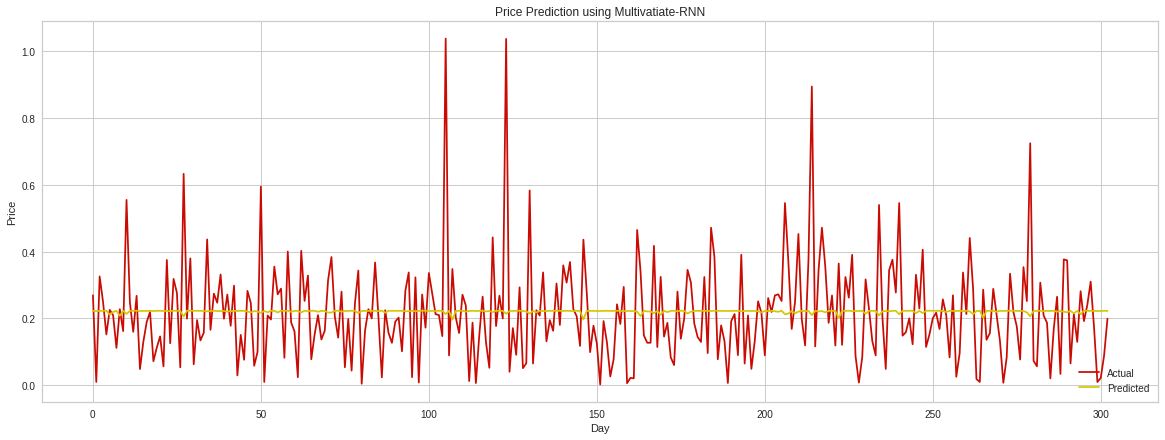

In [117]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,1)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
print('MAPE Score = {}'.format(mape))
print('BDP = {}'.format(bdp))
print('LDP = {}'.format(ldp))

plot_data(true,predicted)

In [118]:
test_data

5TC_C+1MON  5TC_CCURQ    Value  shift_30
Date                                                
2018-06-05     17440.0    17630.0  15124.0   24045.0
2020-02-13      5597.0     4516.0   2532.0    2797.0
2020-05-25      7197.0     5753.0   4140.0   28657.0
2018-06-11     16860.0    16990.0  17240.0   22488.0
2019-11-22     21806.0    21217.0  18930.0   14451.0
...                ...        ...      ...       ...
2022-09-01     14771.0    13307.0   3887.0   16214.0
2020-01-23      6444.0     7588.0   5071.0    2787.0
2019-02-24      6625.0     6929.0   5873.0    3763.0
2019-12-14     14681.0    20294.0  18002.0    9322.0
2018-04-07     12130.0    11957.0   7156.0   18308.0

[303 rows x 4 columns]

In [216]:
actualvalue

[11984.11273407799,
 12691.264156495336,
 14833.578347712482,
 15485.798637021695,
 15485.798637021695,
 15485.798637021695,
 15356.467108437992,
 16393.205329504126,
 18882.489589340992,
 17893.729193394618,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 15789.65819611351,
 12182.282011746567,
 11496.685844093174,
 11425.762102611789,
 11474.435258530386,
 11474.435258530386,
 11474.435258530386,
 11956.994832923343,
 11612.110756700135,
 11227.59282494321,
 10532.262026106097,
 10241.613752192183,
 10241.613752192183,
 10241.613752192183,
 10313.928155271242,
 9905.768976353856,
 9137.428443638846,
 7901.130283306458,
 7292.715834323984,
 7292.715834323984,
 7292.715834323984,
 6990.246936829841,
 6705.1613093066235,
 6390.176457433411,
 5917.351514224174,
 5835.302479961394,
 5835.302479961394,
 5835.302479961394,
 5824.87251797883

In [217]:
true = true.reshape(-1, 1)
predicted = predicted.reshape(-1, 1)
cols = list(series)[0:35]
df_for_training = df[cols].astype(float)
true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)



actualvalue = sc.inverse_transform(true_copies)[:,0]
predictedvalue = sc.inverse_transform(predicted_copies)[:,0]

In [218]:
actualvalue = actualvalue.tolist()
predictedvalue = predictedvalue.tolist()
actualVSpredicted = pd.DataFrame(
    {'Actual': actualvalue,
     'Predicted': predictedvalue
    })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
# resultant_dfalt = resultant_df.reset_index(level=0)
# li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
# actualVSpredicted['Dates'] = pd.DataFrame({'col':li})

<AxesSubplot:>

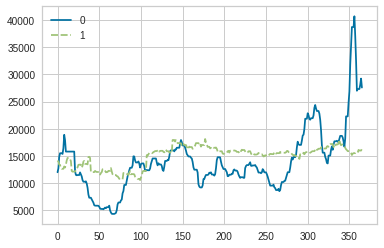

In [219]:
sns.lineplot(data=[actualvalue,predictedvalue])

In [220]:
Res=actualVSpredicted
Res

Actual     Predicted
0    11984.112734  14144.865234
1    12691.264156  13928.657227
2    14833.578348  13388.331055
3    15485.798637  13343.367188
4    15485.798637  12778.198242
..            ...           ...
361  27311.984864  16107.568359
362  27311.984864  15976.186523
363  28115.091936  15976.186523
364  29232.488530  15976.186523
365  27583.859206  16287.798828

[366 rows x 2 columns]

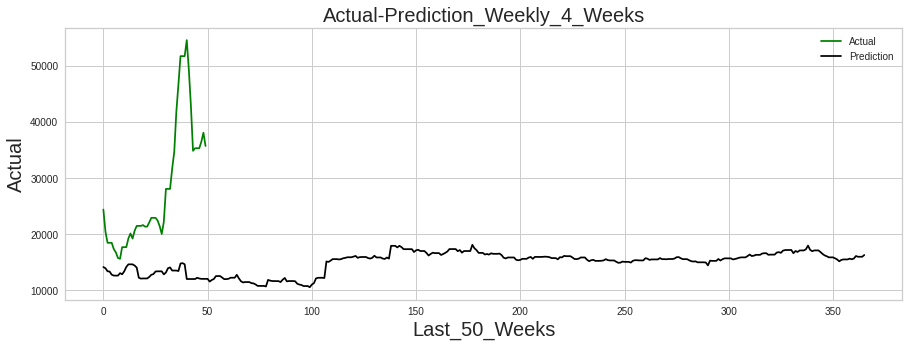

MAPE: 0.35444267652772954


In [222]:
font1 = {'size':20}
font2 = {'size':20}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(df["shift_30"].iloc[-50:].values,color="green",label="Actual")
plt.plot(Res["Predicted"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Actual",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["Predicted"].shape[0]):
    Mape.append((np.abs((Res["Actual"].iloc[i] - Res['Predicted'].iloc[i]) / Res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

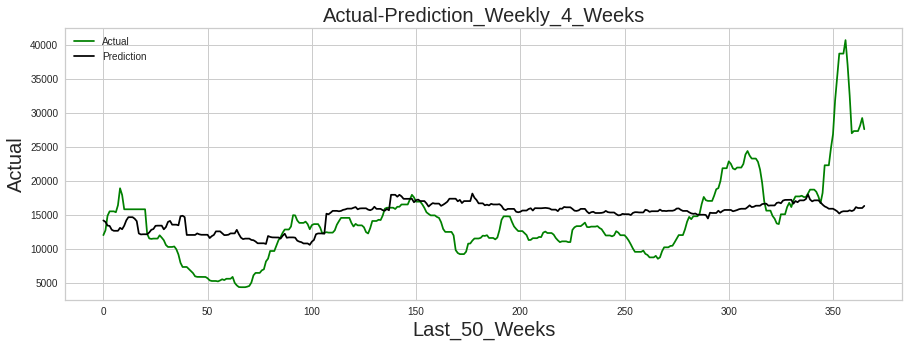

MAPE: 0.35444267652772954


In [223]:
font1 = {'size':20}
font2 = {'size':20}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["Actual"],color="green",label="Actual")
plt.plot(Res["Predicted"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Actual",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["Predicted"].shape[0]):
    Mape.append((np.abs((Res["Actual"].iloc[i] - Res['Predicted'].iloc[i]) / Res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [1054]:
n_past = 10
n_days_for_prediction=90

train_data = series[:int(len(series)*0.9)]
val_data = series[int(len(series)*0.9):int(len(series)*1)]

train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()



train_data = series[:int(len(series)*1)]
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()

# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)


timesteps = 30
hl = [50,45]
lr = 1e-4
batch_size = 32
num_epochs = 100

X_train = []
Y_train = []

In [330]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

directional_acc(Res["Predicted"],df["shift_4"].iloc[-50:].values,X_Final["Value"].iloc[-50:].values)

66.0

In [276]:
X_Final["Value"].iloc[-50:]

df["shift_4"]


Date
2018-04-01    17565.428571
2018-04-08    17780.714286
2018-04-15    20083.857143
2018-04-22    17727.857143
2018-04-29    12447.285714
                  ...     
2023-10-22    22164.000000
2023-10-29    24336.428571
2023-11-05    44283.571429
2023-11-12    41072.571429
2023-11-19    36756.000000
Name: shift_4, Length: 295, dtype: float64

In [270]:
Res


Actual     Predicted
0   11923.762563  12329.560547
1   10682.407047  12714.381836
2    8415.486707  12808.335938
3    6321.403902  11214.512695
4    5620.550026  10962.385742
5    5582.628260  10792.063477
6    4866.773390  10414.162109
7    5744.657626   9857.121094
8    8438.966523   9951.386719
9   11762.758110   9988.669922
10  13699.004373   9677.381836
11  13182.075723   9940.614258
12  12171.884588  11593.000977
13  13669.002386  12677.241211
14  13282.703507  13216.649414
15  12953.147516  13067.797852
16  14862.746052  14037.795898
17  15722.647730  15496.185547
18  16561.864808  15084.985352
19  14912.594074  14558.545898
20  12996.752889  15055.329102
21  10017.238765  15362.323242
22  10763.188796  15561.715820
23  11482.491098  14824.781250
24  13114.245144  14096.931641
25  12891.932282  13304.290039
26  11398.075569  13636.020508
27  11902.239398  13704.415039
28  11077.184749  13957.445312
29  12247.075904  13903.205078
30  13010.449449  13149.897461
31  12203.750053  13263.690430
32  11826.302691  12771.842773
33  10139.017018  13146.389648
34   9017.669451  13650.500000
35   9378.345515  13625.025391
36  11099.546479  13676.770508
37  13902.030243  12803.450195
38  16235.569903  12651.952148
39  19372.268352  13163.082031
40  21208.259527  13518.656250
41  22490.332025  14390.524414
42  17626.189964  15147.076172
43  14117.168717  16326.190430
44  16454.994375  16680.767578
45  17529.195961  17123.988281
46  18946.091055  15582.163086
47  31955.959000  14423.145508
48  29861.689847  15079.356445
49  27046.348088  15790.541016

In [1057]:
X_train = []
Y_train = []

# Loop for training data
for i in range(train.shape[0]):
    X_train.append(train[i][:-1])
    Y_train.append(train[i][-1])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [689]:
X_train

array([[0.16236781, 0.16372505, 0.07755531, 0.21722711, 0.27272727],
       [0.14504974, 0.16101717, 0.06194859, 0.20549596, 0.27272727],
       [0.16897033, 0.17786878, 0.07314843, 0.20439637, 0.27272727],
       ...,
       [0.08765113, 0.16905923, 0.09790599, 0.15276843, 0.90909091],
       [0.11466192, 0.18010495, 0.11190844, 0.14392815, 0.90909091],
       [0.06985951, 0.18584454, 0.13191497, 0.1715477 , 1.        ]])

In [690]:
Y_train

array([1.87504743e-01, 1.90164397e-01, 2.18617580e-01, 1.89511397e-01,
       1.24274860e-01, 1.18505511e-01, 1.77093794e-01, 1.90009089e-01,
       1.80212313e-01, 1.81966591e-01, 2.51673535e-01, 2.61364419e-01,
       2.74837412e-01, 2.77308225e-01, 2.95576361e-01, 2.91871906e-01,
       2.88419827e-01, 2.71215905e-01, 2.39400651e-01, 2.04800438e-01,
       1.73151081e-01, 1.64291450e-01, 1.88189511e-01, 1.99936465e-01,
       1.90916231e-01, 2.01632502e-01, 2.06175269e-01, 2.03349717e-01,
       1.41334063e-01, 8.14874297e-02, 8.90957705e-02, 1.53615771e-01,
       1.65152705e-01, 1.84980984e-01, 1.68867750e-01, 1.53303389e-01,
       1.57849686e-01, 1.61303531e-01, 1.54434669e-01, 1.42175904e-01,
       9.41221111e-02, 7.31978504e-02, 6.12797049e-02, 4.72419544e-02,
       3.68857161e-02, 2.48793272e-02, 3.78228603e-02, 3.06504417e-02,
       1.81322415e-02, 2.29291494e-02, 4.01966062e-02, 4.92150755e-02,
       6.82968153e-02, 1.10071212e-01, 1.05680224e-01, 1.17301872e-01,
      

In [691]:
train_data

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   
...                  ...           ...           ...   
2022-11-06  10856.857143  13178.857143  11240.142857   
2022-11-13  11084.714286  13526.714286  12818.285714   
2022-11-20   9258.285714  12498.571429  10312.857143   
2022-11-27  10684.285714  13117.428571  11446.285714   
2022-12-04   8319.000000  13439.000000  13065.714286   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714  
...                                   ...    ...           ...  
2022-11-06                   -8391.512348     11  13065.714286  
2022-11-13                   -8676.126368     11  13507.285714  
2022-11-20                   -9411.360800     11  16186.142857  
2022-11-27                  -10033.111725     11  19851.714286  
2022-12-04                   -8090.585977     12  18749.000000  

[245 rows x 6 columns]

In [692]:
test_data.head()

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                  
2022-12-11  8944.571429  13838.428571  13507.285714   
2022-12-18  9597.000000  14354.428571  16186.142857   
2022-12-25  9642.285714  12391.428571  19851.714286   
2023-01-01  7661.714286   9057.428571  18749.000000   
2023-01-08  7904.571429   9657.857143  13569.571429   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2022-12-11                   -7340.079257     12  13569.571429  
2022-12-18                   -5779.123648     12  11666.285714  
2022-12-25                   -1831.181974     12   8190.571429  
2023-01-01                   -1009.458251      1   4979.857143  
2023-01-08                   -3951.591351      1   3905.285714

In [785]:
X_test=[]
Y_test=[]
for i in range(test.shape[0]):
    X_test.append(test[i][:-1])
    Y_test.append(test[i][-1])
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [786]:
X_test[:4]

array([[0.08170886, 0.19297378, 0.13737017, 0.18221869, 1.        ],
       [0.09406693, 0.20218365, 0.17046495, 0.20441294, 1.        ],
       [0.09492472, 0.16714688, 0.21574967, 0.26054625, 1.        ],
       [0.05740943, 0.1076397 , 0.20212666, 0.27222983, 0.        ]])

In [787]:
Y_test[:4]

array([0.13813965, 0.11462633, 0.07168712, 0.03202174])

In [788]:
sc.transform(test_data)[:7]

array([[0.08170886, 0.19297378, 0.13737017, 0.18221869, 1.        ,
        0.13813965],
       [0.09406693, 0.20218365, 0.17046495, 0.20441294, 1.        ,
        0.11462633],
       [0.09492472, 0.16714688, 0.21574967, 0.26054625, 1.        ,
        0.07168712],
       [0.05740943, 0.1076397 , 0.20212666, 0.27222983, 0.        ,
        0.03202174],
       [0.06200955, 0.1183565 , 0.13813965, 0.23039748, 0.        ,
        0.01874642],
       [0.06302969, 0.11887156, 0.11462633, 0.18982253, 0.        ,
        0.01802811],
       [0.05296085, 0.11094169, 0.07168712, 0.15312982, 0.        ,
        0.00446864]])

In [280]:
test_data

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2022-12-11   8944.571429  13838.428571  13507.285714   
2022-12-18   9597.000000  14354.428571  16186.142857   
2022-12-25   9642.285714  12391.428571  19851.714286   
2023-01-01   7661.714286   9057.428571  18749.000000   
2023-01-08   7904.571429   9657.857143  13569.571429   
2023-01-15   7958.428571   9686.714286  11666.285714   
2023-01-22   7426.857143   9242.428571   8190.571429   
2023-01-29   6037.428571   8088.428571   4979.857143   
2023-02-05   7449.571429   7288.857143   3905.285714   
2023-02-12   7863.714286   7181.714286   3847.142857   
2023-02-19   6573.428571   6437.285714   2749.571429   
2023-02-26   7739.857143   6775.714286   4095.571429   
2023-03-05  14491.428571   8062.285714   8226.571429   
2023-03-12  17303.857143   9033.285714  13322.714286   
2023-03-19  18272.142857   9330.142857  16291.428571   
2023-03-26  17807.285714   9045.285714  15498.857143   
2023-04-02  19398.285714  14192.000000  13950.000000   
2023-04-09  21384.142857  20475.714286  16245.428571   
2023-04-16  20192.857143  19569.857143  15653.142857   
2023-04-23  18657.285714  18506.285714  15147.857143   
2023-04-30  19785.285714  18632.000000  18075.714286   
2023-05-07  20220.285714  18539.142857  19394.142857   
2023-05-14  20288.142857  18873.714286  20680.857143   
2023-05-21  18448.000000  17789.857143  18152.142857   
2023-05-28  16736.428571  17015.857143  15214.714286   
2023-06-04  15194.571429  15728.571429  10646.428571   
2023-06-11  16703.428571  15847.000000  11790.142857   
2023-06-18  16641.428571  15720.000000  12893.000000   
2023-06-25  16955.285714  15685.285714  15394.857143   
2023-07-02  15964.285714  15994.571429  15054.000000   
2023-07-09  14205.428571  14407.000000  12763.571429   
2023-07-16  14364.285714  14760.285714  13536.571429   
2023-07-23  13087.571429  13597.714286  12271.571429   
2023-07-30  14077.714286  14089.428571  14065.285714   
2023-08-06  15337.857143  14435.142857  15235.714286   
2023-08-13  15590.428571  14414.857143  13998.857143   
2023-08-20  16082.142857  14481.000000  13420.142857   
2023-08-27  13492.142857  13302.714286  10833.142857   
2023-09-03  13517.428571  12646.714286   9113.857143   
2023-09-10  16010.285714  12727.000000   9666.857143   
2023-09-17  16649.428571  12889.285714  12305.857143   
2023-09-24  18768.714286  13296.857143  16602.714286   
2023-10-01  18981.714286  15317.714286  20180.571429   
2023-10-08  19403.714286  19781.285714  24989.857143   
2023-10-15  19247.000000  20157.571429  27804.857143   
2023-10-22  19783.428571  20841.142857  29770.571429   
2023-10-29  16730.000000  19089.714286  22312.714286   
2023-11-05  14153.142857  18318.428571  16932.571429   
2023-11-12  15302.857143  19738.428571  20517.000000   
2023-11-19  17023.714286  20938.000000  22164.000000   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2022-12-11                   -7340.079257     12  13569.571429  
2022-12-18                   -5779.123648     12  11666.285714  
2022-12-25                   -1831.181974     12   8190.571429  
2023-01-01                   -1009.458251      1   4979.857143  
2023-01-08                   -3951.591351      1   3905.285714  
2023-01-15                   -6805.289735      1   3847.142857  
2023-01-22                   -9385.943601      1   2749.571429  
2023-01-29                  -12584.544296      1   4095.571429  
2023-02-05                  -14219.221355      2   8226.571429  
2023-02-12                  -14665.074653      2  13322.714286  
2023-02-19                  -14933.799031      2  16291.428571  
2023-02-26                  -14635.263409      2  15498.857143  
2023-03-05                  -11669.420365      3  13950.000000  
2023-03-12                   -6991.275470      3  16245.428571  
2023-03-19                   -2847.902105      3  15653.14285

In [383]:
C_F=df.corr().abs()

In [384]:
C_F

5TC_C+1MON  5TC_CCURQ     Value  \
5TC_C+1MON                       1.000000   0.899372  0.887152   
5TC_CCURQ                        0.899372   1.000000  0.914032   
Value                            0.887152   0.914032  1.000000   
EMA_Value_ewm_3-Value_ewm_210    0.763917   0.800473  0.919955   
Month                            0.253398   0.404740  0.358536   
shift_4                          0.696496   0.651744  0.635510   

                               EMA_Value_ewm_3-Value_ewm_210     Month  \
5TC_C+1MON                                          0.763917  0.253398   
5TC_CCURQ                                           0.800473  0.404740   
Value                                               0.919955  0.358536   
EMA_Value_ewm_3-Value_ewm_210                       1.000000  0.364232   
Month                                               0.364232  1.000000   
shift_4                                             0.598816  0.285359   

                                shift_4  
5TC_C+1MON                     0.696496  
5TC_CCURQ                      0.651744  
Value                          0.635510  
EMA_Value_ewm_3-Value_ewm_210  0.598816  
Month                          0.285359  
shift_4                        1.000000

In [385]:
for i in C_F.columns:
    print((C_F[i]<.5).sum())

1
1
1
1
5
1


In [386]:
thre=20
l=[]
for i in C_F.columns:
    x=(C_F[i]<.5).sum()
    if(x>=2):
        l.append(i)
    

In [387]:
len(l)

1

In [382]:
C_F[l]


5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  \
5TC_CCURMON                               1.000000    0.905247    0.783693   
5TC_C+1MON                                0.905247    1.000000    0.953690   
5TC_C+2MON                                0.783693    0.953690    1.000000   
5TC_CCURQ                                 0.946831    0.899372    0.790414   
5TC_C+1Q                                  0.633658    0.845381    0.941331   
Value                                     0.969252    0.887152    0.744590   
Value_rollm_3                             0.975681    0.846837    0.714026   
Value_rollm_7                             0.977823    0.858617    0.721893   
Value_ewm_3                               0.935533    0.811832    0.680467   
Value_ewm_7                               0.969528    0.840867    0.708423   
EMA_Value_ewm_3-Value_ewm_180             0.877542    0.751617    0.597304   
EMA_Value_ewm_3-Value_ewm_210             0.891120    0.763917    0.609497   
EMA_Value_ewm_14-Value_ewm_150            0.860548    0.704077    0.547145   
EMA_Value_ewm_14-Value_ewm_180            0.871939    0.715413    0.559378   
EMA_Value_ewm_14-Value_ewm_210            0.879366    0.723594    0.569050   
shift_4                                   0.626018    0.696496    0.632156   
5TC_CCURMON_fshift_1                      0.952800    0.840405    0.729644   
5TC_C+1MON_fshift_1                       0.919804    0.967421    0.919576   
5TC_C+1MON_fshift_2                       0.896845    0.913428    0.867638   
5TC_C+1MON_fshift_3                       0.851303    0.855792    0.809762   
5TC_C+1MON_fshift_4                       0.794983    0.806998    0.755694   
5TC_C+2MON_fshift_1                       0.802500    0.941483    0.977945   
5TC_C+2MON_fshift_2                       0.795263    0.912059    0.939175   
5TC_C+2MON_fshift_3                       0.773383    0.878461    0.895309   
5TC_C+2MON_fshift_4                       0.743071    0.848950    0.852374   
5TC_CCURQ_fshift_1                        0.918103    0.848996    0.747560   
5TC_CCURMON_rollm_3                       0.965675    0.858192    0.745378   
5TC_CCURMON_rollm_4                       0.938591    0.833188    0.724164   
5TC_C+1MON_rollm_3                        0.922983    0.976872    0.929418   
5TC_C+1MON_rollm_4                        0.917404    0.959358    0.911610   
5TC_C+1MON_rollm_6                        0.891580    0.925363    0.873930   
5TC_C+1MON_rollm_8                        0.866293    0.893808    0.834975   
5TC_C+2MON_rollm_3                        0.803236    0.946867    0.983938   
5TC_C+2MON_rollm_4                        0.803556    0.938802    0.971099   
5TC_C+2MON_rollm_6                        0.794839    0.922168    0.942671   
5TC_C+2MON_rollm_8                        0.787783    0.904386    0.910127   
5TC_CCURQ_rollm_3                         0.923357    0.859130    0.757234   
5TC_CCURQ_rollm_4                         0.902049    0.836680    0.738543   
5TC_C+1Q_rollm_3                          0.675397    0.869162    0.958645   
5TC_C+1Q_rollm_4                          0.690574    0.876409    0.962696   
Value_rollm_4                             0.958327    0.823560    0.695446   
Value_rollm_6                             0.906819    0.781164    0.658099   
Value_ewm_3_rollm_3                       0.952212    0.811882    0.685828   
EMA_Value_ewm_3-Value_ewm_210_rollm_3     0.881440    0.722081    0.576161   
EMA_Value_ewm_3-Value_ewm_210_rollm_4     0.861982    0.702093    0.558462   
5TC_C+1MON_ewm_3                          0.902242    0.938503    0.881872   
5TC_C+1MON_ewm_4                          0.886247    0.912979    0.853529   
5TC_C+1MON_ewm_6                          0.849575    0.862840    0.801721   
5TC_C+2MON_ewm_3                          0.807158    0.931417    0.947306   
5TC_C+2MON_ewm_4                          0.802527    0.914951    0.922470   
5TC_C+1Q_ewm_3                            0.712930    0.88944